# Ensemble Learning Using Random Forests
This a lab session to use tree ensembles, in particular Random Forests, to build a interesting classifier related to human activity recognition using mobile phone data.

## Read Documentation about the Data Sources

The features selected for this UCI database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

tBodyAcc-XYZ
tGravityAcc-XYZ
tBodyAccJerk-XYZ
tBodyGyro-XYZ
tBodyGyroJerk-XYZ
tBodyAccMag
tGravityAccMag
tBodyAccJerkMag
tBodyGyroMag
tBodyGyroJerkMag
fBodyAcc-XYZ
fBodyAccJerk-XYZ
fBodyGyro-XYZ
fBodyAccMag
fBodyAccJerkMag
fBodyGyroMag
fBodyGyroJerkMag

The set of variables that were estimated from these signals are: 

mean(): Mean value
std(): Standard deviation
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array
sma(): Signal magnitude area
energy(): Energy measure. Sum of the squares divided by the number of values. 
iqr(): Interquartile range 
entropy(): Signal entropy
arCoeff(): Autorregresion coefficients with Burg order equal to 4
correlation(): correlation coefficient between two signals
maxInds(): index of the frequency component with largest magnitude
meanFreq(): Weighted average of the frequency components to obtain a mean frequency
skewness(): skewness of the frequency domain signal 
kurtosis(): kurtosis of the frequency domain signal 
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
angle(): Angle between to vectors.

Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

gravityMean
tBodyAccMean
tBodyAccJerkMean
tBodyGyroMean
tBodyGyroJerkMean

## Import the Data and Browse
- Data is located in <project_root>/exercises/data/samsungdata.csv
    - For solutions notebook, the relative file path is '../data/samsungdata.csv'
    - For exercise notebook, the relative path is './data/samsungdata.csv'


In [1]:
%pylab inline
import seaborn as sbn
import pandas as pd
X_raw = pd.read_csv('../data/samsungdata.csv')

Populating the interactive namespace from numpy and matplotlib


### First, take a look at the data and get acquainted
For example, you could do things like
```python
X_raw.shape
```

```python
X_raw.head()
```

For a more detailed overview of your data, look at
```python
X_raw.describe()
```

In particular, browse to see if there are any variables in your data that are NOT numerical sensor measurements to be used for prediction.

In [2]:
X_raw.head()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,2,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,3,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,4,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing


In [3]:
X_raw.shape

(7352, 564)

In [4]:
X_raw.describe()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,3676.500000,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,2122.483922,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,1838.750000,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,3676.500000,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,5514.250000,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,7352.000000,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### Cleaning up the data and getting ready for Machine Learning
We'll do a very crude data cleaning step, just enough to get the data in a usable form.

There are two columns, "Unnamed: 0", "subject" and "activity" that are categorical and/or not useful.

1. The 'activity' column contains the targets to be used for classification (activity categories). Extract that into a separate variable.
Hint:
```python
truth_har = X_raw['activity']
```
Take a look at the distribution of the activity class labels.

2. Do a similar analysis for the 'subject' column.

3. Remove the 3 columns 'Unnamed: 0', 'subject', and 'activity' from X_raw

In [5]:
# Interesting non-numerical variables to check
subjects = X_raw['subject']
truth_har = X_raw['activity']

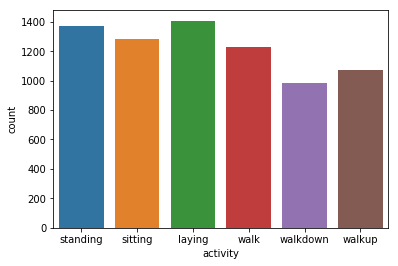

In [6]:
sbn.countplot(truth_har)

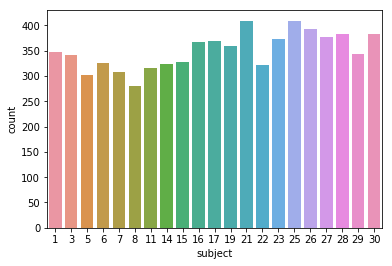

In [7]:
sbn.countplot(subjects)

In [8]:
X_raw = X_raw.drop(['Unnamed: 0','subject','activity'], axis=1)

In [9]:
X_raw.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


## Build a RF Classifier as a Black Box
Some observations about this problem
- What if we don't know much about Human Activity Recognition?
- What if we don't know a lot about the sensors (accelerometers, gyroscopes, etc)?
- Can we get some results very fast that will give us reasonably good performance?

Make a pass at this problem using Random Forest Classifiers. Pick some reasonable defaults and test your algorithm.

In [10]:
import sklearn.ensemble as ens # check out: ens.RandomForestClassifier
from sklearn.model_selection import train_test_split

Use the sklearn helper function 'train_test_split' to split your matrix/data into test and training set. Set aside 20% of the data for testing final model performance.

In [11]:
## ... First we need to split into training and validation sets
shuffle_seed = 31459
test_slice = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_raw,truth_har,
                                                    test_size=test_slice,
                                                    random_state=shuffle_seed,
                                                    shuffle=True)

In [12]:
X_train.shape

(5881, 561)

In [13]:
X_test.shape

(1471, 561)

Select some reasonable parameter choices for your RandomForestClassifier.

For example,
```python
rf_classifier = ens.RandomForestClassifier(max_features=<choose one>, n_estimators=<choose>, oob_score=True)
```

Note the following parameters are key to exploring the bias/variance tradeoff of Random Forests.
- max_features : number of features to be randomly selected in the construction of individual trees
    - Recommended to be approx $\sqrt{N_{features}}$
- n_estimators : total number of trees to be built for the ensemble. Pick some value between 25 and 500


In [14]:
# ... Some initial paramaters just to try it out
nfeatures = X_train.shape[1]
nf_sample = np.int(np.round(np.sqrt(nfeatures)))
ntrees = 500
rf = ens.RandomForestClassifier(max_features=nf_sample, n_estimators=500, oob_score=True, n_jobs=-1)

In [15]:
nf_sample

24

Fit the model to the training data, and calculate the OOB error/accuracy

In [16]:
m1 = rf.fit(X_train,y_train)

CPU times: user 56.1 s, sys: 96 ms, total: 56.1 s
Wall time: 7.03 s


In [17]:
m1.oob_score_

0.9806155415745621

Now, calculate the test set error for this model.
- How is the performance?
- How close was the out-of-bag error to the test set error? Any insights to gain there?

Hint: you can make predictions on the test set like this:
```python
m = rf.fit(X_train,y_train)
y_test_predict = m.predict(X_test)
```

In [21]:
from sklearn.metrics import accuracy_score
y_test_pred = m1.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_test_pred)

0.9830047586675731

## RF Classifier Hyper-parameter Tuning
We were able to achieve reasonably good performance, with no application of domain knowledge, in the previous example. This is an impressive feat. However, how can we really know if this performance is good? We only arbitrarily selected a single parameter setting?

Random Forests have a variety of parameters that can be tuned before training the model. These parameters fall into a couple categories:
1. Changing the loss functions used to construct individual decision trees (we will not consider this)
2. Modifying the construction process of the Ensemble Learner.

As we learned in the lecture on Ensemble Learning and Random Forests, the trick to high performance is
1. Having the ability to create a large number of trees (wisdom of the crowds)
2. Ensuring each tree has 'novelty', in the sense of statistical independence from the other trees.
3. Making each tree satisfy the "Weak Learner" condition for convergence
3. Note 1 and 2 above are in conflict with each other. The more trees we construct, the hard it is to maintain statistical independence from the previous trees.

The two Random Forest hyper-parameters that align with our wishes are:
- max_features
    - Proper subset of features to be sampled in construction of the tree.
    - By having this number be much less than the total number of features, this introduces novelty and statistical independence between trees in the ensemble.
- n_estimators
    - The number of trees to construct.
    
Before we can begin a grid search, we need to get a sense for how much computational power we have behind the scenes to train a single model. This will help us estimate the time we need to complete a grid search.

As a suggestion, use max_features=25 and n_estimators=500 to get a ballpark estimate.


```python
%%time
rf_benchmark1 = ens.RandomForestClassifier(max_features=25, n_estimators=500, oob_score=True)
rf_benchmark1.fit(X_train,y_train)
```

**FIGURE OUT HOW MANY PARAMETER COMBINATIONS YOU WILL BE ABLE TO EXPLORE IN APPROX 3min OF COMPUTATION TIME**

In [23]:
%%time
rf_benchmark1 = ens.RandomForestClassifier(max_features=25, n_estimators=500, oob_score=True, n_jobs=-1)
rf_benchmark1.fit(X_train,y_train)

CPU times: user 50.1 s, sys: 0 ns, total: 50.1 s
Wall time: 50.1 s


One of the limiting performance factors in the previous example is that all the computations were run on a single CPU. To see this, open up your shell, and run htop in a tmux session. Then, rerun the above code segment and which the CPU usage and load.
```bash
user@host:~/$ htop
```
We can check the number of cores on the machine that's hosting our notebook, along with the specs of those processors by running the following shell command in our notebook:
```
!cat /proc/cpuinfo
```

From this, we can see colaboratory runs on 2 vCPUs.

Let's modify training to use ALL CPUs, and benchmark the progress. We do this by adding the parameter "n_jobs" when we construct the Random Forest (specifying the number of cores to use in training). If n_jobs=-1, all available cores are used in model training.
```python
%%time
rf_benchmark2 = ens.RandomForestClassifier(max_features=25, n_estimators=500, oob_score=True, n_jobs=-1)
rf_benchmark2.fit(X_train,y_train)
```

In [25]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 16
core id		: 0
cpu cores	: 8
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single kaiser fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(

In [26]:
%%time
rf_benchmark2 = ens.RandomForestClassifier(max_features=25, n_estimators=500, oob_score=True, n_jobs=-1)
rf_benchmark2.fit(X_train,y_train)

CPU times: user 56.3 s, sys: 84 ms, total: 56.4 s
Wall time: 6.05 s


Based on the measured performance, create a grid search to find an 'optimal' mode over a variety of parameter combinations. Here's a suggestion for how this may look:
```python
from sklearn.model_selection import GridSearchCV
model_template = ens.RandomForestClassifier(random_state=123)
param_grid = { 
    'n_estimators': [<fill in here>],
    'max_features': [<fill in here>],
}
rf_gridCV = GridSearchCV(estimator=model_template,param_grid=param_grid,n_jobs=-1,cv=None)
rf_gridCV.fit(X_train,y_train)
rf_gridCV.best_params_
rf_gridCV.best_score_
```

In [28]:
%%time
from sklearn.model_selection import GridSearchCV
model_template = ens.RandomForestClassifier(random_state=123)
param_grid = { 
    'n_estimators': [50,100,200,500],
    'max_features': [10,20,30,50],
}
rf_gridCV = GridSearchCV(estimator=model_template,param_grid=param_grid,n_jobs=-1,cv=None)
rf_gridCV.fit(X_train,y_train)

CPU times: user 23.6 s, sys: 216 ms, total: 23.8 s
Wall time: 1min 51s


In [31]:
rf_gridCV.best_params_

{'max_features': 10, 'n_estimators': 500}

In [32]:
rf_gridCV.best_score_

0.9785750722666213

Finally, evaluate the 'best' Random Forest on the test set.
```python
rf_gridCV.best_model
```

In [33]:
y_pred_best = rf_gridCV.best_estimator_.predict(X_test)
accuracy_score(y_pred=y_pred_best,y_true=y_test)

0.9836845683208701

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_template = ens.RandomForestClassifier(random_state=123)
param_grid = { 
    'n_estimators': [50,100,250,500],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [ ]:
rf_gridCV = GridSearchCV(estimator=model_template,param_grid=param_grid,n_jobs=-1,cv=5)